In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
main_df = pd.read_csv('../data/main_db.csv')

In [4]:
main_df.sample(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,stock name,Sectors
2842,2015-05-07 00:00:00-04:00,14.733333,15.832000,14.683333,15.786667,141838500,0.0,0.0,TSLA,consumer-cyclical
5330,2015-03-27 00:00:00-04:00,27.986950,28.016156,27.614001,27.690388,158184800,0.0,0.0,AAPL,technology
44536,2017-10-25 00:00:00-04:00,61.476899,61.683177,61.108553,61.270626,9153300,0.0,0.0,XOM,energy


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73779 entries, 0 to 73778
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          73779 non-null  object 
 1   Open          73779 non-null  float64
 2   High          73779 non-null  float64
 3   Low           73779 non-null  float64
 4   Close         73779 non-null  float64
 5   Volume        73779 non-null  int64  
 6   Dividends     73779 non-null  float64
 7   Stock Splits  73779 non-null  float64
 8   stock name    73779 non-null  object 
 9   Sectors       73779 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [6]:
main_df['date'] = pd.to_datetime(main_df['Date'], format='%Y-%m-%d %H:%M:%S%z')

C:\Users\pedro\AppData\Local\Temp\ipykernel_1940\1155894651.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main_df['date'] = pd.to_datetime(main_df['Date'], format='%Y-%m-%d %H:%M:%S%z')


# Risk-Return

Risk

In [7]:
main_df['Day variation'] = (main_df['Close'] - main_df['Open']) * 100 / main_df['Open']

In [8]:
main_df.sample(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,stock name,Sectors,date,Day variation
20853,2016-12-05 00:00:00-05:00,13.447485,13.537687,13.244533,13.304667,19851800,0.0,0.0,KEY,financial-services,2016-12-05 00:00:00-05:00,-1.062038
30666,2015-12-07 00:00:00-05:00,13.708903,13.915264,13.708903,13.866709,44958009,0.0,0.0,T,communication-services,2015-12-07 00:00:00-05:00,1.151119
52707,2020-04-20 00:00:00-04:00,53.695992,55.543311,53.563408,54.518005,17446000,0.0,0.0,BMY,healthcare,2020-04-20 00:00:00-04:00,1.530865


In [9]:
# This shows what is the expected variation per day of each stock
volatility = main_df.groupby('stock name')['Day variation'].std()

In [10]:
# Top 10 most volatile stocks
volatility.sort_values(ascending=False)[:9]

stock name
AMD     2.958266
PCG     2.859758
UBER    2.824252
TSLA    2.810581
AAL     2.618633
CCL     2.563956
NVDA    2.289169
PYPL    1.915225
KEY     1.886324
Name: Day variation, dtype: float64

Return

In [11]:
main_df['Gains'] = (main_df['Close'] - main_df['Open'] + main_df['Dividends']) * 100 / main_df['Open']

In [12]:
# This shows what is the average return of each stock
average_return = main_df.groupby('stock name')['Gains'].mean()

In [13]:
# Top 10 most returnables stocks
average_return.sort_values(ascending=False)[:9]

stock name
NVDA    0.101886
AAPL    0.085134
INTC    0.081977
PCG     0.079942
AMD     0.067973
META    0.064523
CSX     0.064229
MSFT    0.058413
TSLA    0.053242
Name: Gains, dtype: float64

Making a dataframe with risk-return

In [14]:
rr_df = pd.merge(volatility, average_return, on='stock name')

In [15]:
rr_df.head()

,Day variation,Gains
stock name,,
AAL,2.618633,-0.090584
AAPL,1.374553,0.085134
AMD,2.958266,0.067973
AMZN,1.604384,-0.007860
BA,1.822444,-0.007573


# Diversification

The goal here is to understand the correlation between assets. For a good diversification, it is good a weak correlation

In [16]:
diversity_df = main_df[['stock name', 'Close']]

In [17]:
diversity_df = diversity_df.set_index('stock name')

In [18]:
def group_stocks(df):

    new_df = pd.DataFrame()

    stocks = list(df.index.unique())

    for stock in stocks:

        # This will group each stock with their own prices
        new_column = list(df.loc[stock]['Close'])

        # Adding each stock as a column
        new_df[stock] = new_column[:1181] # Uber has data since 2019, so to the correlation i decided use 5y 
    
    return new_df


In [19]:
diversity_df = group_stocks(diversity_df)

In [20]:
diversity_df.head()

,AMD,TSLA,AAPL,F,AAL,NVDA,PFE,INTC,KEY,BAC,...,GOOG,BMY,META,TFC,WFC,GM,CSX,CVS,VZ,PCG
0,4.17,11.778667,17.191612,10.143892,28.904451,3.785536,20.477730,19.284931,9.864887,14.059324,...,28.983862,40.653282,58.509998,27.597553,34.834167,29.186865,7.662162,53.746128,29.282484,36.288071
1,3.67,11.904000,17.268005,10.230434,29.413532,3.780819,20.503963,19.073923,9.956425,14.175041,...,29.016739,40.817131,57.509998,27.562445,34.961525,29.537064,7.713171,54.414810,29.055346,36.173763
2,3.62,12.100000,17.414223,10.156257,29.554943,3.766667,20.333475,18.938271,9.632527,13.935349,...,28.894197,40.176670,56.630001,27.211412,34.721802,29.247761,7.656496,53.864128,29.380701,36.305660
3,3.47,11.640000,17.097675,9.785363,28.659340,3.669966,19.730228,18.697117,9.104424,13.596472,...,27.990833,37.935123,54.450001,26.860388,34.070065,28.037365,7.424135,53.203312,29.239513,35.892395
4,3.41,11.308000,17.236391,9.711185,28.451939,3.646379,19.448271,18.629288,9.055137,13.480755,...,27.427942,37.026581,53.549999,26.530436,34.107525,27.984070,7.407135,53.124645,29.276331,35.980320


In [21]:
correlation_matrix = diversity_df.corr()

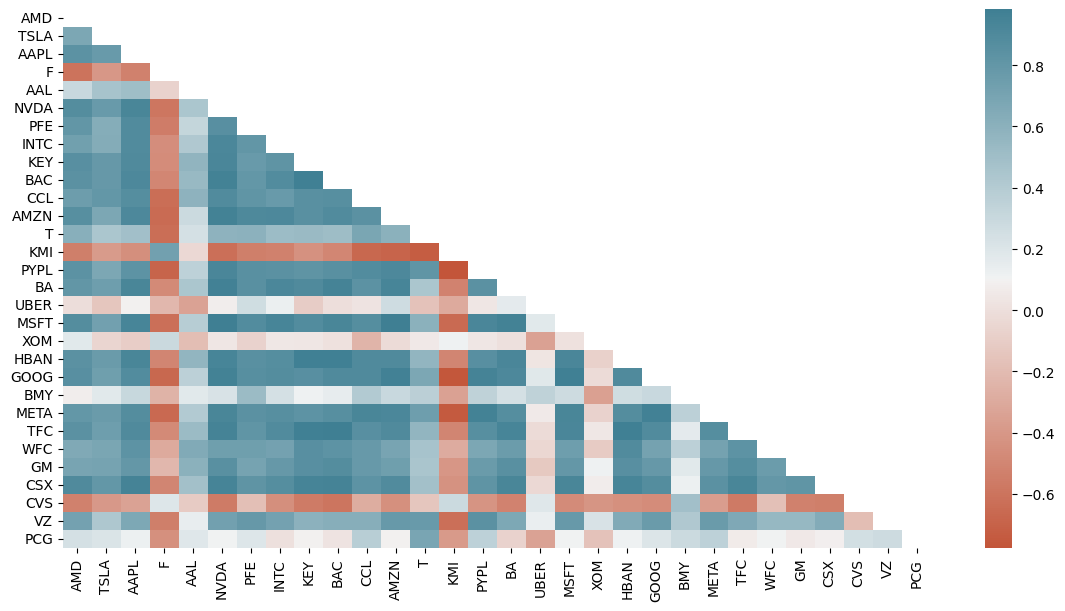

In [22]:
f, ax = plt.subplots(figsize=(14, 7))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
colors = sns.diverging_palette(20, 220, as_cmap=True)
cmap = sns.heatmap(correlation_matrix, mask=mask, cmap=colors)

# Pairing assets

Finding the best match for each asset

In [23]:
# Mtch risk calculation
def portfolio_return(rr_df, correlation_matrix, a1,a2):
    
    # For this study i decided to use the same weight for each asset
    w1 = 0.5
    w2 = 0.5

    # Return of each asset
    r1 = rr_df.loc[a1]['Gains']
    r2 = rr_df.loc[a2]['Gains']

    # Varietion of each asset
    v1 = rr_df.loc[a1]['Day variation']
    v2 = rr_df.loc[a2]['Day variation']

    # Correlation between assets
    corr = correlation_matrix.loc[a1][a2]

    # Risk an return formula 
    p_return = (w1 * r1) + (w2 * r2) 

    p_risk = np.sqrt((w1*w1*v1*v1) + (w2*w2*v2*v2) + 2*w1*w2*corr)

    return [p_risk, p_return]

In [24]:
# Random test
portfolio_return(rr_df, correlation_matrix, 'TSLA', 'GOOG')

[1.6741628745530934, 0.04995131055345443]

In [25]:
def find_all_risk_return(rr_df, correlation_matrix):
    assets_dict = dict()

    for stock in rr_df.index:
        for second_stock in rr_df.index:
            if stock != second_stock:

                rr = portfolio_return(rr_df, correlation_matrix, a1=stock, a2=second_stock)

                assets_risk = rr[0]
                assets_return = rr[1]
                
                d = { (stock , second_stock ): {'Risk' : assets_risk, 'Return' : assets_return}}

                assets_dict.update(d)
    
    return assets_dict

In [26]:
assets_risk_return = find_all_risk_return(rr_df, correlation_matrix)

In [27]:
assets_risk_return[('TSLA', 'GOOG')]

{'Risk': 1.6741628745530934, 'Return': 0.04995131055345443}

In [28]:
assets_risk_return_df = pd.DataFrame(assets_risk_return).transpose()

In [29]:
assets_risk_return_df

Risk    Return
AAL AAPL  1.562106 -0.002725
    AMD   2.012861 -0.011306
    AMZN  1.581863 -0.049222
    BA    1.663461 -0.049079
    BAC   1.583681 -0.044245
...            ...       ...
XOM TFC   1.040086  0.020879
    TSLA  1.546893  0.038524
    UBER  1.506752  0.032865
    VZ    0.897961  0.024042
    WFC   0.953320  0.018649

[870 rows x 2 columns]

# Portfolio optimization

To optimize the choices i'm gonna use Sharpe Ratio

In [30]:
# Spliting the multiindex into a index and a column
def split_multiindex(df):

    new_index = list()
    new_column = list()

    for i in df.index:

        main_stock = i[0]
        pair = i[1]

        new_index.append(main_stock)
        new_column.append(pair)

    return [new_index, new_column]


In [31]:
split_multiind = split_multiindex(assets_risk_return_df)

In [32]:
assets_risk_return_df.index = split_multiind[0]
assets_risk_return_df['Pair'] = split_multiind[1]

In [33]:
assets_risk_return_df.head()

,Risk,Return,Pair
AAL,1.562106,-0.002725,AAPL
AAL,2.012861,-0.011306,AMD
AAL,1.581863,-0.049222,AMZN
AAL,1.663461,-0.049079,BA
AAL,1.583681,-0.044245,BAC


In [34]:
# Calculatind the average return of each asset pairing
pairs_average_return = assets_risk_return_df.groupby(assets_risk_return_df.index)['Return'].mean()

Sharpe Ratio = (average return - risk-free rate) / risk


In [35]:
def sharpe_ratio(df, returns):
    sharpe_ratio_list = list()

    for i in range(len(df)):

        # Taking the average return of main stock
        main_stock = df.iloc[i].name
        main_stock_return = returns[main_stock]

        # Sharpe radio variables
        risk_free_return = df.iloc[i]['Return']
        risk = df.iloc[i]['Risk']

        # Sharp Radio formula
        
        sharpe_ratio = (main_stock_return - risk_free_return) / risk

        sharpe_ratio_list.append(sharpe_ratio)

    return sharpe_ratio_list

In [36]:
assets_risk_return_df['Sharpe ratio'] = sharpe_ratio(assets_risk_return_df, pairs_average_return)

In [37]:
assets_risk_return_df.sample(10)

,Risk,Return,Pair,Sharpe ratio
AAL,1.599021,-0.038547,WFC,0.003773
WFC,1.331807,-0.002517,PYPL,0.015202
META,1.218495,0.036047,PFE,0.005185
TFC,1.043439,0.013573,BMY,0.006048
WFC,1.214364,0.047734,INTC,-0.024708
KMI,0.742073,0.000741,VZ,-0.000712
PFE,0.993109,0.015924,VZ,-0.001060
BAC,1.612541,-0.014386,CCL,0.016505
BA,0.992956,0.000279,CVS,0.007333
TFC,1.320553,-0.008716,GM,0.021657


In [38]:
# Changing the index to number for be easier to find the index
assets_risk_return_df.reset_index(inplace=True)
assets_risk_return_df.rename(columns={'index':'Main stock'}, inplace=True)

In [39]:
max_sharpes_ids = assets_risk_return_df.groupby('Main stock')['Sharpe ratio'].idxmax()

In [40]:
assets_risk_return_df.iloc[max_sharpes_ids][['Main stock', 'Pair', 'Sharpe ratio']]

,Main stock,Pair,Sharpe ratio
9,AAL,F,0.019828
29,AAPL,AAL,0.035235
58,AMD,AAL,0.027492
87,AMZN,AAL,0.035809
116,BA,AAL,0.034049
145,BAC,AAL,0.035659
174,BMY,AAL,0.038019
203,CCL,AAL,0.029852
232,CSX,AAL,0.035372
261,CVS,AAL,0.039140
